In [1]:
import gym
import pync
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt
from MountainCar.agents import QLearningAgent

In [2]:
# Initialize learning environment and agent
env = gym.make('MountainCar-v0')
agent = QLearningAgent(env)

In [3]:
# Play N episodes to train the agent
N = 1000
total_rewards = np.empty(N)
for n in tqdm(range(N)):
    eps = 1.0/np.sqrt(n+1)
    total_reward = agent.play(epsilon=eps, env=env, gamma=0.99)
    total_rewards[n] = total_reward

100%|██████████| 1000/1000 [07:17<00:00,  2.29it/s]


In [4]:
def plot_running_avg(totalrewards):
    N = len(totalrewards)
    running_avg = np.empty(N)
    for t in range(N):
        running_avg[t] = totalrewards[max(0, t-100):(t+1)].mean()
    plt.plot(running_avg)
    plt.title("Running Average")
    plt.show()

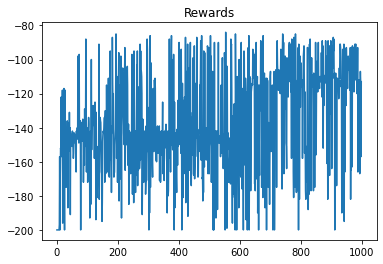

In [5]:
# Sanity check on training
plt.plot(total_rewards)
plt.title("Rewards")
plt.show()

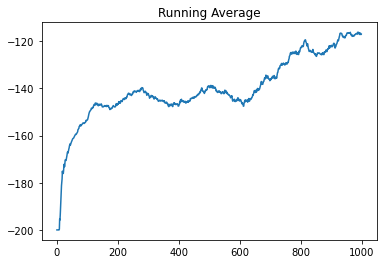

In [6]:
plot_running_avg(total_rewards)

In [ ]:
# Test if the agent is properly trained
agent.play(epsilon=0, env=env, render=True)
env.close()